# Pi with python

The goal of this first notebook is to get you started with setting up your python environment. 

[Download notebook :fontawesome-solid-download:](../pi.ipynb){: .md-button .md-button--primary download="pi.ipynb"}

The bare minimum required to run this notebook is

 - python: the language interpreter
 - numpy: a library for multidimensional array and much more
 - jupyter: a library that lets you open, edit and run notebooks like this one!

Perhaps the most straightforward way to get started is simply to install the newly developed [jupyterlab app](https://github.com/jupyterlab/jupyterlab_app). This will have all necessary dependencies installed at this point. Later on you will need to install additionaly packages.

In [1]:
# we tell the interpreter that we will use numpy 
import numpy as np


In [2]:
%load_ext autoreload
%autoreload 2

# the following loads my solution file, which you do not have! 
# you should comment the following line, or create your solution in solutions/sol_ols.py
%cd /Users/connorjones/mystuff

/Users/connorjones/mystuff


## Computing Pi by numerical integration

Our goal is simply to compute an approximation to the constant $\pi$. We are going to do this in a very very crude way. You can read more about computing approximation to the constant [here](https://fivethirtyeight.com/features/even-after-22-trillion-digits-were-still-no-closer-to-the-end-of-pi/)

We are going to use the fact that the area under a circle with unit radius is equal to $\pi$. Hence we can simply partitioned the unit square of $[0,1] x [0,1]$ into small squares and computer the area covered by squares that are inside the circle. This will give us an approximation to the constant. 

So, I ask you to simlpy write a function that takes a number $n$ which is the number of blocks in which to split the $x$ and $y$ coordinates of the unit square (ie we have $n^2$ little squares). 

This function should then return the area covered by small squares that are fully included under the unit circle, as well as the area covered by small squares fully covered as well as partially covered. The first number should be lower bound on $\pi$ and the second number should be an upper bound. You need to multiply your number by 4 since we are focusing on the top right quadrant.

You can implement this function by computing a naive double for loop. We are simpy trying to get acquainted with python at this point. As a matter of fact, this could be implemented without numpy.

Here is the outcome of the function I wrote:

In [3]:
def compute_pi_helper(blk_num, corner):
    xy_values = np.empty([blk_num*blk_num, 2], dtype=float)
    blk_inc = 1 / blk_num  
    for x in range(blk_num + 1):
        start = int(blk_num*(x-1))
        finish = int(blk_num * x)
        if corner == "right":
            height = x
        else:
            height = x - 1
        x_val = blk_inc * height
        for y in range(blk_num):
            if corner == "right":
                side = y + 1
            else:
                side = y
            y_val = blk_inc * side
            xy_values[start+y] = [x_val, y_val]
    return xy_values;


def area_calc(array):
    blk_inc = float(1 / np.sqrt(len(array)))
    origin = [0,0]
    count = 0
    for x in range(len(array)):
        if np.linalg.norm(origin-array[x]) < 1:
            count = count + 1
        else:
            count = count
    return (count * blk_inc**2) * 4;


def compute_pi(num_sqr):
    under = area_calc(compute_pi_helper(num_sqr, "right"))
    over = area_calc(compute_pi_helper(num_sqr, "left"))
    return [under, over];

In [4]:
s = compute_pi(1000)

We can compare this values to the value of $\pi$

In [5]:
np.pi

3.141592653589793

In [6]:
# we apply a simple test
assert s[0] < np.pi
assert s[1] > np.pi

## Run several times

Do this for values of n between 10 and 1000 with steps of 100. Construct your response using python list comprehension. Store the vector of values in N and the results in R.

In [7]:
def repeat_pi():
    array = [None] * 10
    n = [None] * 10
    for x in range(0,10):
        array[x] = compute_pi((100*x)+10)
        n[x] = (100*x)+10
        print(x)
    return [n, np.array(array)];

In [8]:
N,R = repeat_pi()
R

0
1
2
3
4
5
6
7
8
9


array([[2.68      , 3.44      ],
       [3.10247934, 3.17487603],
       [3.12145125, 3.15945578],
       [3.12844953, 3.15421436],
       [3.13135039, 3.15083879],
       [3.13347174, 3.14914264],
       [3.13463048, 3.14773448],
       [3.13582226, 3.14708193],
       [3.13659503, 3.14646548],
       [3.13702693, 3.14581331]])

In [9]:
# we apply a simple test
assert (R[9,0] - np.pi)**2 < 1e-3
assert (R[9,1] - np.pi)**2 < 1e-3

# we check that the precision is increasing for a couple of values
assert (R[6,0] - np.pi)**2 < (R[5,0] - np.pi)**2
assert (R[6,1] - np.pi)**2 < (R[5,1] - np.pi)**2

Next we import matplotlib and plot our results. We plot both bounds.

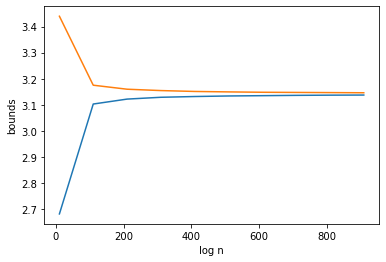

In [10]:
import matplotlib.pyplot as plt
plt.plot(N,R)
plt.xlabel("log n")
plt.ylabel("bounds")
plt.show()

Use matplotlib to plot the log distance between the 2 bounds versus the log of n. Given your results, and assuming linearity in this representation, how large would n have to be to get to the precision listed in the article linked at the begining? Given how long your function is taking, how much time would that be using this crude approach?

In [11]:
def plot_pi1(N,R):
    logn = np.log(N)
    logr = np.log(R)
    log_diff = [None] * 10
    for x in range(len(R)):
        log_diff[x] = logr[x][1] - logr[x][0]
    plt.plot(logn,log_diff)
    plt.xlabel("log n")
    plt.ylabel("bounds")
    return plt.show();

def plot_pi(N,R):
    logn = np.log(N)
    diff = [None] * 10
    for x in range(len(R)):
        diff[x] = R[x][1] - R[x][0]
    log_diff = np.log(diff)
    plt.plot(logn,log_diff)
    plt.xlabel("log n")
    plt.ylabel("bounds")
    return plt.show();

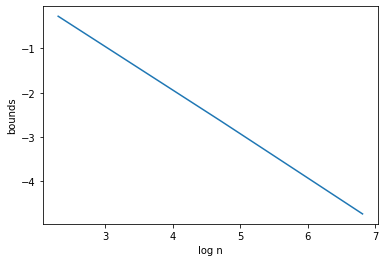

In [12]:
plot_pi(N,R)

In order to reach the level of precision cited in the article it would take increasing the number of squares used by several orders of magnitude beyond 1000 squares.  Givin that the function run time increases exponentially for each additional division, reaching that level of precision would take a very long time as the function already requires nearly a minute to run.

## Use draws instead

As we all know, an expectation is an integral, and an area is also an integral. Instead of cutting out the unit square inm smaller square, we can simply draw points uniformaly. 

Express a $G(x,y)$ function wich is 1 if $x,y$ is in the unit circle and 0 otherwise. Then if we draw $x$ and $y$ from the unit square as before we should get that:

$$ \mathbb{E} \big[ G(x,y) \big] = \frac{\pi}{4} $$

Draw n uniform $x$ and $y$ using the right function from [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html) and compute the expecation over your draws. Compare this value to $\pi$.

In [13]:
def sim_pi(num_draw):  
    x_sim = np.random.uniform(1,0,num_draw)
    y_sim = np.random.uniform(1,0,num_draw)
    xy_sim = np.column_stack((x_sim, y_sim))
    origin = [0,0]
    count = 0
    for x in range(len(xy_sim)):
        if np.linalg.norm(origin-xy_sim[x]) < 1:
            count = count + 1
        else:
            count = count
    return (count / num_draw) * 4;

# ttest3 = [None] * R
# ttest3 = list(map(lambda x: q4_helper(data), ttest3))

In [14]:
np.random.seed(10) # set the seed to fix randomness

pi_hat = sim_pi(100000)
pi_hat

3.1404

In [15]:
# we run a simple test
assert (pi_hat - np.pi)**2 < 1e-3